#   

# 作業目標:

    1. 藉由固定的 dataset, 來驗證不同loss function
    2. Dataset 的特性跟我們選用的loss function 對accrancy 的影響
    
    
# 作業重點: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate
    

# 導入必要的函數

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

tf.random.set_seed(42)

# 資料準備

In [2]:
#取得Keras Dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [3]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:', x_train.shape, " labels:", y_train.shape) 
print("test  data:",'images:', x_test.shape, " labels:", y_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [4]:
#資料正規化
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [5]:
#針對Label 做 ONE HOT ENCODE
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)
y_test.shape

(10000, 10)

# 建立模型

In [6]:
model = tf.keras.Sequential()
#卷積層1與池化層1
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32, 3), # ignore batch size 
                 activation='relu', 
                 padding='same'))
model.add(tf.keras.layers.Dropout(rate=0.25))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
#卷積層2與池化層2
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))
model.add(tf.keras.layers.Dropout(rate=0.25))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
#建立神經網路(平坦層、隱藏層、輸出層)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(rate=0.25))
model.add(tf.keras.layers.Dense(1024, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.25))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

#檢查model的STACK
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                    

# 載入之前訓練的模型

In [7]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17734636415284488073
xla_global_id: -1
]


In [8]:
model_mse = tf.keras.models.clone_model(model)
model_binary = tf.keras.models.clone_model(model)

# 訓練模型

In [9]:
# model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
train_history = model.fit(x_train, y_train, validation_split=0.2,
                        epochs=10, batch_size=64, verbose=1)    

Epoch 1/10
625/625 [==============================] - 81s 128ms/step - loss: 2.0637 - accuracy: 0.2500 - val_loss: 1.9245 - val_accuracy: 0.3583
Epoch 2/10
625/625 [==============================] - 83s 133ms/step - loss: 1.7574 - accuracy: 0.3717 - val_loss: 1.7095 - val_accuracy: 0.4291
Epoch 3/10
625/625 [==============================] - 82s 131ms/step - loss: 1.5967 - accuracy: 0.4255 - val_loss: 1.6182 - val_accuracy: 0.4613
Epoch 4/10
625/625 [==============================] - 82s 131ms/step - loss: 1.5042 - accuracy: 0.4618 - val_loss: 1.5113 - val_accuracy: 0.4987
Epoch 5/10
625/625 [==============================] - 87s 140ms/step - loss: 1.4293 - accuracy: 0.4893 - val_loss: 1.4379 - val_accuracy: 0.5293
Epoch 6/10
625/625 [==============================] - 80s 129ms/step - loss: 1.3680 - accuracy: 0.5112 - val_loss: 1.4088 - val_accuracy: 0.5468
Epoch 7/10
625/625 [==============================] - 82s 132ms/step - loss: 1.3218 - accuracy: 0.5308 - val_loss: 1.3696 - val_ac

In [10]:
model_mse.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])
train_history_mse = model_mse.fit(x_train, y_train, validation_split=0.2,
                        epochs=10, batch_size=64, verbose=1)   

Epoch 1/10
625/625 [==============================] - 85s 135ms/step - loss: 0.0902 - accuracy: 0.1049 - val_loss: 0.0899 - val_accuracy: 0.1259
Epoch 2/10
625/625 [==============================] - 87s 139ms/step - loss: 0.0899 - accuracy: 0.1194 - val_loss: 0.0897 - val_accuracy: 0.1283
Epoch 3/10
625/625 [==============================] - 86s 138ms/step - loss: 0.0897 - accuracy: 0.1319 - val_loss: 0.0896 - val_accuracy: 0.1422
Epoch 4/10
625/625 [==============================] - 85s 137ms/step - loss: 0.0895 - accuracy: 0.1390 - val_loss: 0.0895 - val_accuracy: 0.1544
Epoch 5/10
625/625 [==============================] - 87s 138ms/step - loss: 0.0893 - accuracy: 0.1478 - val_loss: 0.0893 - val_accuracy: 0.1630
Epoch 6/10
625/625 [==============================] - 88s 140ms/step - loss: 0.0891 - accuracy: 0.1571 - val_loss: 0.0892 - val_accuracy: 0.1833
Epoch 7/10
625/625 [==============================] - 89s 142ms/step - loss: 0.0888 - accuracy: 0.1667 - val_loss: 0.0889 - val_ac

In [11]:
model_binary.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy']) 
train_history_binary = model_binary.fit(x_train, y_train, validation_split=0.2,
                        epochs=10, batch_size=64, verbose=1)   

Epoch 1/10
625/625 [==============================] - 89s 141ms/step - loss: 0.3401 - accuracy: 0.1283 - val_loss: 0.3639 - val_accuracy: 0.2146
Epoch 2/10
625/625 [==============================] - 88s 141ms/step - loss: 0.3241 - accuracy: 0.1731 - val_loss: 0.3552 - val_accuracy: 0.2789
Epoch 3/10
625/625 [==============================] - 87s 140ms/step - loss: 0.3130 - accuracy: 0.2177 - val_loss: 0.3449 - val_accuracy: 0.2975
Epoch 4/10
625/625 [==============================] - 83s 133ms/step - loss: 0.3031 - accuracy: 0.2489 - val_loss: 0.3366 - val_accuracy: 0.3189
Epoch 5/10
625/625 [==============================] - 83s 133ms/step - loss: 0.2969 - accuracy: 0.2719 - val_loss: 0.3291 - val_accuracy: 0.3335
Epoch 6/10
625/625 [==============================] - 85s 137ms/step - loss: 0.2917 - accuracy: 0.2941 - val_loss: 0.3257 - val_accuracy: 0.3434
Epoch 7/10
625/625 [==============================] - 85s 136ms/step - loss: 0.2867 - accuracy: 0.3126 - val_loss: 0.3191 - val_ac

In [12]:
#定義一個繪圖函數
def show_train_history(train_history, train_acc, test_acc, loss_name):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title(loss_name)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_acc', 'val_acc'], loc='upper left')
    plt.show()

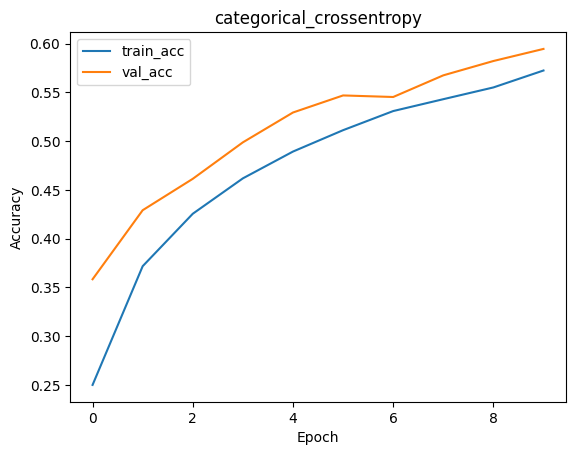

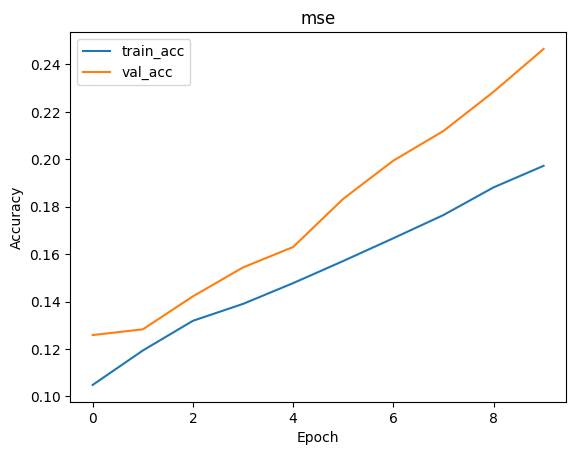

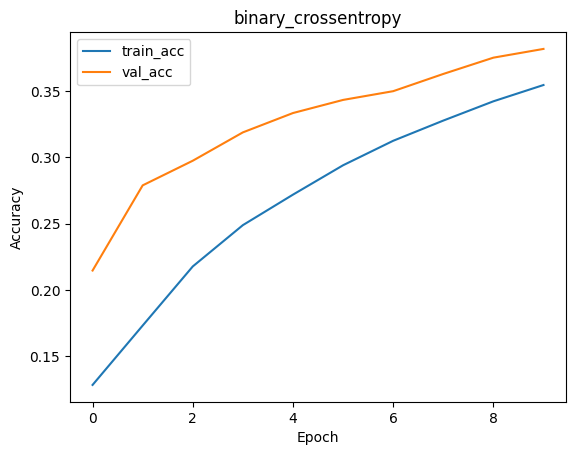

In [13]:
show_train_history(train_history, 'accuracy', 'val_accuracy', 'categorical_crossentropy')
show_train_history(train_history_mse, 'accuracy', 'val_accuracy', 'mse')
show_train_history(train_history_binary, 'accuracy', 'val_accuracy', 'binary_crossentropy')